## 2. Random Forest

### a)

In [1]:
import pandas as pd

In [128]:
headers = ["Number of times pregnant",
           "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
           "Diastolic blood pressure (mm Hg)",
           "Triceps skinfold thickness (mm)",
           "2-Hour serum insulin (mu U/ml)",
           "Body mass index (weight in kg/(height in m)^2)",
           "Diabetes pedigree function",
           "Age (years)",
           "Class variable(0 or 1)"]

raw_df = pd.read_csv('Diabetes.csv', names= headers)
print(raw_df.shape)
raw_df.head(6)

(768, 9)


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable(0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
ابتدا یک لیست از اسامی هدر ها ایجاد کرده و سپس فایل csv را به کمک ان فراخوانی می کنیم 
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### b)

#### Handling Missing Values

In [129]:
raw_df.isnull().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skinfold thickness (mm)                                             0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable(0 or 1)                                                      0
dtype: int64

In [130]:
raw_df['Class variable(0 or 1)'].value_counts()

0    500
1    268
Name: Class variable(0 or 1), dtype: int64

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
 همانطور که مشخص است داده missing در دیتاست وجود ندارد.
  همینطور با توجه به محموع تعداد هرکدام از مقادیر یکتا که برابر است به تعداد کل رکوردها می توان فهمید که در ستون کلاس null نداریم.
    این تحلیل را برای سایر ستون ها هم می توان انجام داد.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


#### Normalizing Numerical Columns and Encoding Categorical Ones

In [6]:
raw_df.dtypes

Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Diastolic blood pressure (mm Hg)                                              int64
Triceps skinfold thickness (mm)                                               int64
2-Hour serum insulin (mu U/ml)                                                int64
Body mass index (weight in kg/(height in m)^2)                              float64
Diabetes pedigree function                                                  float64
Age (years)                                                                   int64
Class variable(0 or 1)                                                        int64
dtype: object

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
متغیر کتگوریکال نداریم پس نیازی به انکود نیست
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


In [8]:
from sklearn.preprocessing import normalize

In [99]:
numericals = pd.DataFrame(raw_df.loc[:, raw_df.columns != 'Class variable(0 or 1)'])
categoricals = pd.DataFrame(raw_df['Class variable(0 or 1)'])


#remove outlires
print("Before Removing Outliers: ",raw_df.shape)
Q1 = raw_df.loc[:, raw_df.columns != 'Class variable(0 or 1)'].quantile(0.25)
Q3 = raw_df.loc[:, raw_df.columns != 'Class variable(0 or 1)'].quantile(0.75)
IQR = Q3 - Q1 
mask = ~((raw_df < (Q1 - 1.5 * IQR)) | (raw_df > (Q3 + 1.5 * IQR))).any(axis=1)
print("#Outliers = ",raw_df[~mask].dropna().shape[0])
print("#Not outliers = ",raw_df.shape[0]-raw_df[~mask].dropna().shape[0])

raw_df= raw_df[mask]
print("After Removing Outliers: ",raw_df.shape)
raw_df.head()


Before Removing Outliers:  (639, 9)
#Outliers =  48
#Not outliers =  591
After Removing Outliers:  (591, 9)


<ipython-input-99-b4fd3b422372>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = ~((raw_df < (Q1 - 1.5 * IQR)) | (raw_df > (Q3 + 1.5 * IQR))).any(axis=1)
<ipython-input-99-b4fd3b422372>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = ~((raw_df < (Q1 - 1.5 * IQR)) | (raw_df > (Q3 + 1.5 * IQR))).any(axis=1)


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable(0 or 1)
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603,1
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144,0
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591,1
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852,0
5,0.034911,0.809934,0.516682,0.000000,0.000000,0.178744,0.001403,0.209466,0


In [102]:
numericals = pd.DataFrame(raw_df.loc[:, raw_df.columns != 'Class variable(0 or 1)'])
categoricals = pd.DataFrame(raw_df['Class variable(0 or 1)'])

#normalize
raw_df.loc[:, raw_df.columns != 'Class variable(0 or 1)'] = normalize(numericals, norm='l2')

df.loc[:,:]=raw_df
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skinfold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable(0 or 1)
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603,1
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144,0
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591,1
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852,0
5,0.034911,0.809934,0.516682,0.000000,0.000000,0.178744,0.001403,0.209466,0


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
با جزئیاتی کاملا مشابه سوال قبل حذف داده های پرت و نرمال سازی انجام شده است.</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### c)

In [103]:
Y = df['Class variable(0 or 1)']
X = df.drop('Class variable(0 or 1)', axis=1)

### d)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [106]:
print('Distribution of defferent classes in training data:(%) ')
y = pd.DataFrame(y_train)
((y.groupby('Class variable(0 or 1)')['Class variable(0 or 1)'].count())/y_train.shape[0])*100

Distribution of defferent classes in training data:(%) 


Class variable(0 or 1)
0    67.161017
1    32.838983
Name: Class variable(0 or 1), dtype: float64

In [107]:
print('Distribution of defferent classes in test data:(%) ')
y = pd.DataFrame(y_test)
((y.groupby('Class variable(0 or 1)')['Class variable(0 or 1)'].count())/y_test.shape[0])*100

Distribution of defferent classes in test data:(%) 


Class variable(0 or 1)
0    70.588235
1    29.411765
Name: Class variable(0 or 1), dtype: float64

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
به کمک تابع  train_test_split داده ها را به دو بخش آموزشی و تست با نسبت خواسته شده تقسیم می کنیم.سپس درصد وجود هر کلاس را در داده های آموزش و تست محاسبه می کنیم.
    همانطور که مشحص است هر کدام از این دسته ها درصدهای نزدیک به همی در دو نوع داده دارند
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### e)

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
myclassifier = RandomForestClassifier(max_depth=3, criterion='entropy').fit(X_train, y_train)

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
کلاسیفایر جنگل تصادفی را با پارامترهای گفته شده در سوال می سازیم .
    سپس داده ها را برای آموزش به مدل دادیم.

</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### f)

In [137]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [134]:
y_predicted = myclassifier.predict(X_test)
print("[+] confusion matrix\n")
print(confusion_matrix(y_test, y_predicted))
print("\n[+] classification report\n")
print(classification_report(y_test, y_predicted))

[+] confusion matrix

[[72 12]
 [22 13]]

[+] classification report

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        84
           1       0.52      0.37      0.43        35

    accuracy                           0.71       119
   macro avg       0.64      0.61      0.62       119
weighted avg       0.69      0.71      0.70       119



In [135]:
print("Mean Accuracy = ",myclassifier.score(X_test,y_test,y_predicted))

Mean Accuracy =  0.52


In [136]:
print("Accuracy Score = " ,accuracy_score(y_test, y_predicted))

Accuracy Score =  0.7142857142857143


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
توضیح مفصل confusion matrix را در بخش های بعد ذکر خواهم کرد.
    اما در این مرحله خطای mse و دقت را به صورت فوق گزارش کرده ام که دقت حوالی 70 است.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### g)

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

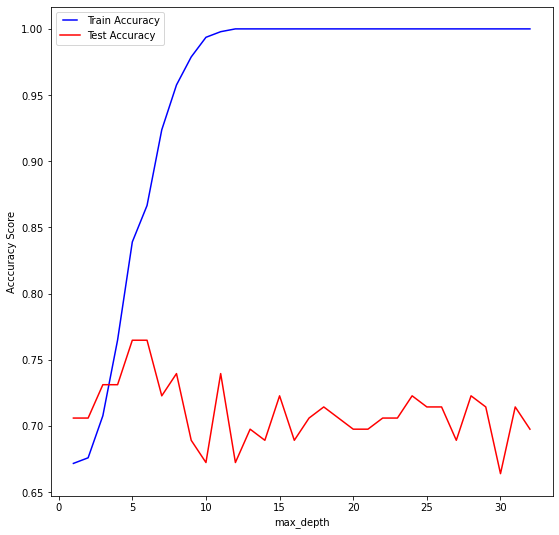

In [139]:
# ranging from 1 to 32

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, criterion='entropy')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    ac = accuracy_score(y_train, train_pred)
    train_results.append(ac)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_results.append(acc)
    
fig, axes = plt.subplots(1,1,figsize=(9,9))    
trains, = plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
tests, = plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={trains: HandlerLine2D(numpoints=2)})
plt.ylabel('Acccuracy Score')
plt.xlabel('max_depth')
plt.show()

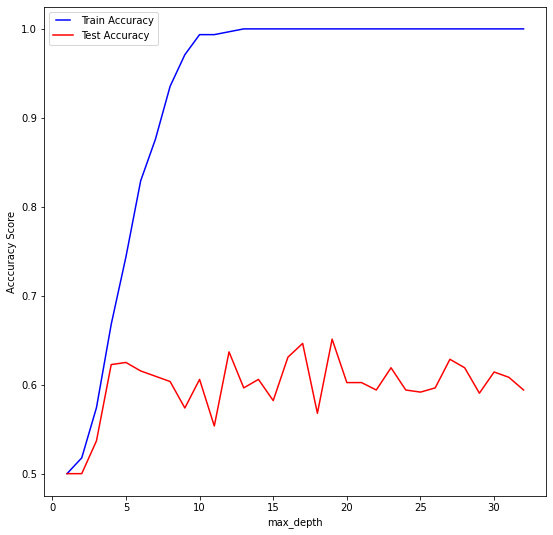

In [140]:
from sklearn.metrics import roc_curve, auc

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = RandomForestClassifier(max_depth=max_depth, criterion='entropy')
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
fig, axes = plt.subplots(1,1,figsize=(9,9))    
trains, = plt.plot(max_depths, train_results, 'b', label='Train Accuracy')
tests, = plt.plot(max_depths, test_results, 'r', label='Test Accuracy')
plt.legend(handler_map={trains: HandlerLine2D(numpoints=2)})
plt.ylabel('Acccuracy Score')
plt.xlabel('max_depth')
plt.show()

In [159]:
myclassifier = RandomForestClassifier(max_depth=5, criterion='entropy').fit(X_train, y_train)

In [163]:
y_predicted = myclassifier.predict(X_test)
print("[+] confusion matrix\n")
print(confusion_matrix(y_test, y_predicted))
print("\n[+] classification report\n")
print(classification_report(y_test, y_predicted))
print("Mean Accuracy = ",myclassifier.score(X_test,y_test,y_predicted))
print("Accuracy Score = " ,accuracy_score(y_test, y_predicted))

[+] confusion matrix

[[80  4]
 [26  9]]

[+] classification report

              precision    recall  f1-score   support

           0       0.75      0.95      0.84        84
           1       0.69      0.26      0.37        35

    accuracy                           0.75       119
   macro avg       0.72      0.60      0.61       119
weighted avg       0.74      0.75      0.70       119

Mean Accuracy =  0.6923076923076923
Accuracy Score =  0.7478991596638656


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
    این پارامتر بیشینه عمق درخت را نمایش می دهد. اگر ست نشود مدل تا جایی ادامه می دهد تا به نودهای تماما خالص برسد یا برگها کمتر ازmin_samples_split  باشند
همانطور که در نمودار هایی که برای دقت در دو بخش train و test رسم کرده ایم مشخص است بعد از مدتی ( حوالی 10  )
مدل ما با خطر overfit شدن مواجه می شود.
یعنی برای داده های آموزش نتایج بسیار خوبی حاصل می شود اما قادر به پیش بینی داده های جدید مخواهد بود.
به همین علت باید این پارامتر را به صورتی مقداررهی کنیم که نه این اتفاق رخ بدهد نه اینکه مدل به علت مقدار کم آن به خوبی آموزش نبیند.
پس این مقدار را برابر 5 قرارداده ام که قبل از بیش برازش است و دقت تست خوبی هم دارد.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">
